## Exploratory Data Analysis

Problem Objective :

The objective of the project is to predict the approximate traffic volume for a specific point of date and time, given the climatic conditions like rainfall, temperature, percentage of the cloud cover, snowfall and the textual description of climate.

Approach :

1. Extract necessary data from the database.
2. Read the data and basic sanity checks on the data to assess the data quality
3. Perform data exploration using single variable to understand the distribution, spread and verify for inconsistencies in the features(verify if there are any anamolies in the features).
4. Perform bivariate analysis with respect to the target variable and the other features and generate meaningful insights.
5. Using the insights generated perform feature engineering.
6. Structure the data tailored for the ML algorithm that is being implemented.
7. Implement ML algorithms upon the data.
8. Monitor the metrics and tune the hyper parameters.
9. Rerun the ML algorithm again to find the deploy the ML solution.

Assumptions :

1. As the task is to predict the hourly traffic volumes, practically such problem statements qualify for a forecast, which takes seasonality and trend into account. But we assume that there is neither upward nor downward trend in the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/traffic.csv',parse_dates=[7])
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,New Years Day,263.49,0.0,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
1,None,263.78,0.0,0.0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502
2,None,264.16,0.0,0.0,75,Snow,heavy snow,2013-01-01 02:00:00,933
3,None,263.95,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576
4,None,263.65,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372
...,...,...,...,...,...,...,...,...,...
45640,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
45641,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
45642,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
45643,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45645 entries, 0 to 45644
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              45645 non-null  object        
 1   temp                 45645 non-null  float64       
 2   rain_1h              45645 non-null  float64       
 3   snow_1h              45645 non-null  float64       
 4   clouds_all           45645 non-null  int64         
 5   weather_main         45645 non-null  object        
 6   weather_description  45645 non-null  object        
 7   date_time            45645 non-null  datetime64[ns]
 8   traffic_volume       45645 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.1+ MB


In [4]:
df.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [5]:
df.shape

(45645, 9)

In [6]:
# Extract time based features from the dataframe
def extract_time_feat(df):
    '''
    Extract time based features from the datetime column.
    
    Input Parameters
        
        df : Input Dataframe
        
    Returns
        
        df : Dataframe with datetime features
    '''
    df['hour'] = df['date_time'].apply(lambda x:x.hour)
    df['day'] = df['date_time'].apply(lambda x:x.day)
    df['month'] = df['date_time'].apply(lambda x:x.month)
    df['year'] = df['date_time'].apply(lambda x:x.year)
    df['weekday'] = df['date_time'].apply(lambda x:x.weekday())
    
    df.loc[:,'weekend'] = df['weekday'].apply(lambda x: 1 if x == 5 or x == 6 else 0)
    df['weekend'] = df['weekend'].astype('category')
    
    return df[['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'hour', 'day',
       'month', 'year','weekday','weekend','traffic_volume']]

df = extract_time_feat(df)

In [7]:
df.loc[:,'weekend'] = df['weekday'].apply(lambda x: 1 if x == 5 or x == 6 else 0)
df['weekend'] = df['weekend'].astype('category')

In [8]:
df = df[['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'hour', 'day',
       'month', 'year','weekday','weekend','traffic_volume']]
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,hour,day,month,year,weekday,weekend,traffic_volume
0,New Years Day,263.49,0.0,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,0,1,1,2013,1,0,1439
1,None,263.78,0.0,0.0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1,1,1,2013,1,0,1502
2,None,264.16,0.0,0.0,75,Snow,heavy snow,2013-01-01 02:00:00,2,1,1,2013,1,0,933
3,None,263.95,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 03:00:00,3,1,1,2013,1,0,576
4,None,263.65,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 04:00:00,4,1,1,2013,1,0,372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45640,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,19,30,9,2018,6,1,3543
45641,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,20,30,9,2018,6,1,2781
45642,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,21,30,9,2018,6,1,2159
45643,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,22,30,9,2018,6,1,1450


In [9]:
df['date_time'].min(),df['date_time'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2018-09-30 23:00:00'))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45645 entries, 0 to 45644
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              45645 non-null  object        
 1   temp                 45645 non-null  float64       
 2   rain_1h              45645 non-null  float64       
 3   snow_1h              45645 non-null  float64       
 4   clouds_all           45645 non-null  int64         
 5   weather_main         45645 non-null  object        
 6   weather_description  45645 non-null  object        
 7   date_time            45645 non-null  datetime64[ns]
 8   hour                 45645 non-null  int64         
 9   day                  45645 non-null  int64         
 10  month                45645 non-null  int64         
 11  year                 45645 non-null  int64         
 12  weekday              45645 non-null  int64         
 13  weekend              45645 non-

## Univariate Analysis

In [11]:
class univariate_plots():
    
    def plot_continuous(self,data,field):
        '''
        Plot a kernel density plot, boxplot and a violin plot for continuous variables
        
        Input parameters
                
            data : Input DataFrame
            field : feature of the input DataFrame
       
        Returns
            
            No specific return by the method, but displays a plot object from the seaborn library
        '''
        plt.figure(figsize=(18,4))
        plt.subplot(1,3,1)
        sns.kdeplot(x = field,data = data)
        plt.subplot(1,3,2)
        sns.boxplot(x = field,data = data)
        plt.subplot(1,3,3)
        sns.violinplot(x = field,data = data)
    
    def plot_categorical(self,data,field,size = None,order = None):
        '''
        Plot a count plot for categorical variables
        
        Input parameters
                
            data : Input DataFrame
            field : feature of the input DataFrame
            size : size of the plot
       
        Returns
            
            No specific return by the method, but displays a plot object from the seaborn library
        '''
        
        if size == None:
            plt.figure(figsize=(12,4))
            sns.countplot(y = field,data = data,order = order)  
        else:
            plt.figure(figsize=size)
            sns.countplot(y = field,data = data,order = order)  
    
    def ret_count_values(self,data,field,normalize = False):
        '''
        Method to return count values from 
        
        Input parameters
                
            data : Input DataFrame
            field : feature of the input DataFrame
       
        Returns
            
            No specific return by the method, but displays a plot object from the seaborn library
        '''
        return data[field].value_counts(normalize = normalize)

make_plot = univariate_plots()

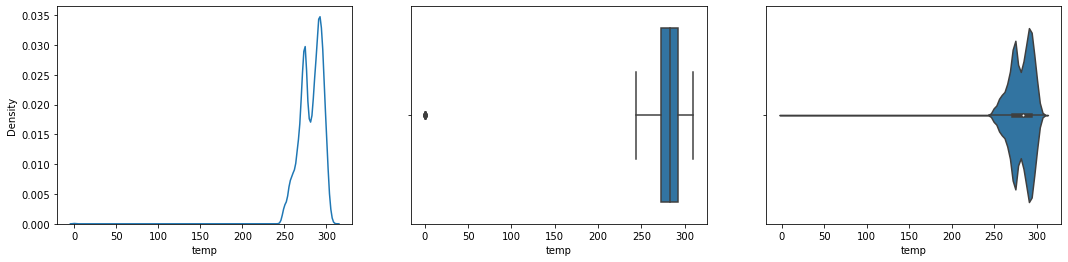

In [12]:
make_plot.plot_continuous(df,'temp')

The above plot reveals that there is an outlier in temperature. The outlier value is near zero. As the feature is expressed in Kelvins,0 Kelvins is equivalent to -273 Celcius which is extremely cold and is not a practical value. Hence this record needs either correction based on the nearby neighbours or eliminated from the table.

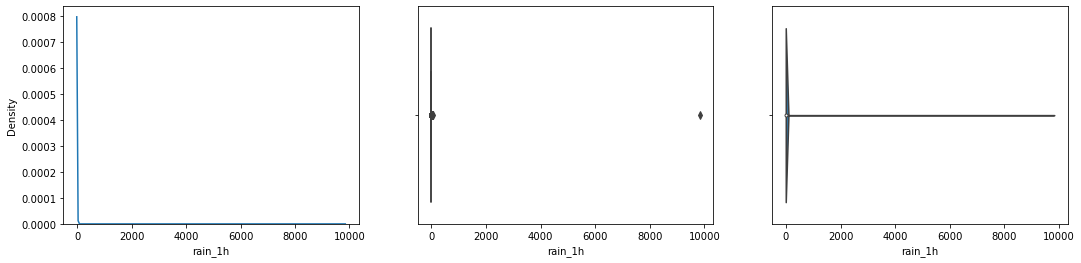

In [13]:
make_plot.plot_continuous(df,'rain_1h')

The above plot reveals an outlier value approximately at 10000. This record has to be either removed or imputed based on nearby values.

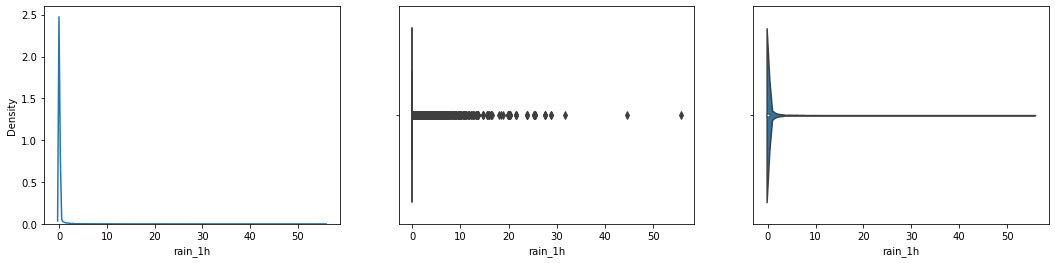

In [14]:
make_plot.plot_continuous(df[df['rain_1h'] < df['rain_1h'].max()],'rain_1h')

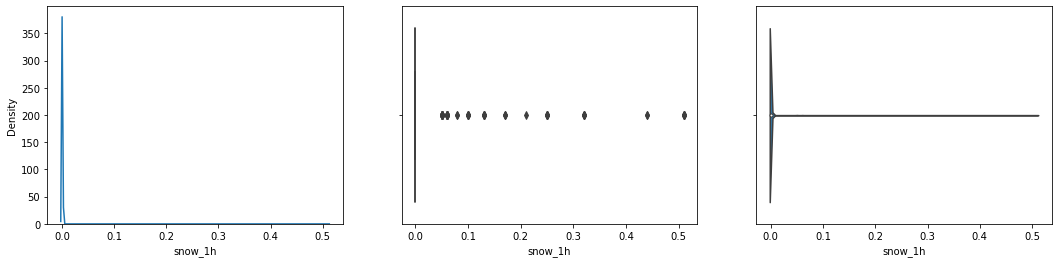

In [15]:
make_plot.plot_continuous(df,'snow_1h')

The feature snow_1h has large number of records near 0. And the plot suggests that there are few outliers, but practically these values look to be real enough.  

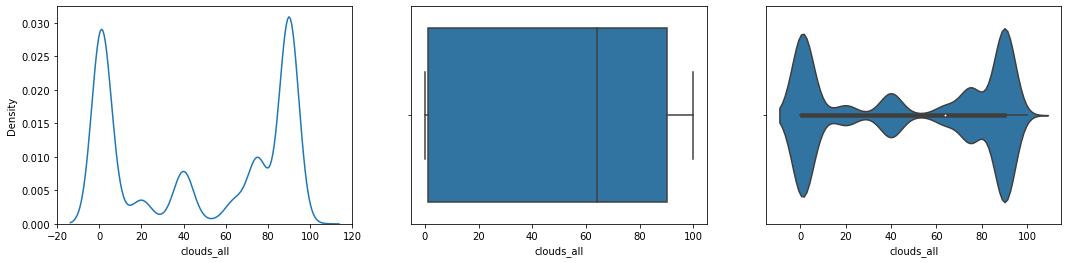

In [16]:
make_plot.plot_continuous(df,'clouds_all')

The plot for the feature clouds_all has two humps around 0 and 90.

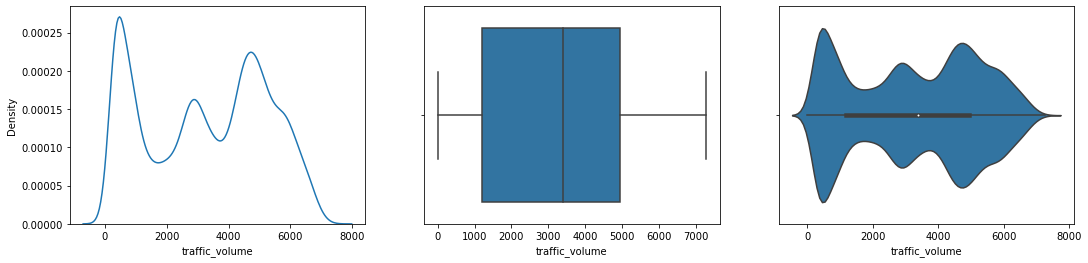

In [17]:
make_plot.plot_continuous(df,'traffic_volume')

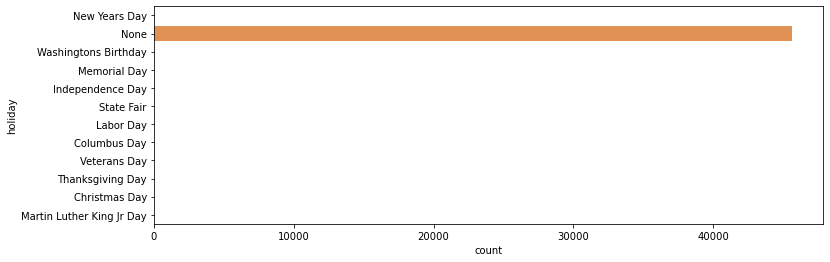

In [18]:
make_plot.plot_categorical(df,'holiday')

None category of the holiday feature is outnumbered other categories. To get a better view we exclude the None category and exmine the plot.

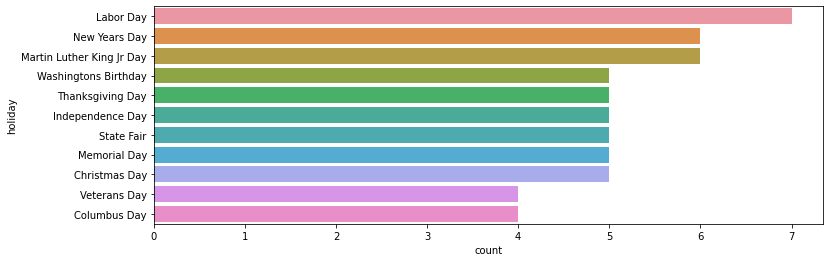

In [19]:
make_plot.plot_categorical(df[df['holiday'] != 'None'],
                           'holiday',
                           order = df[df['holiday'] != 'None']['holiday'].value_counts().index)

These holiday categories have very minimum presence in the dataset. So grouping these categories into lesser number of groups can be a viable option. The grouping of these categories will be carried on further investigations.

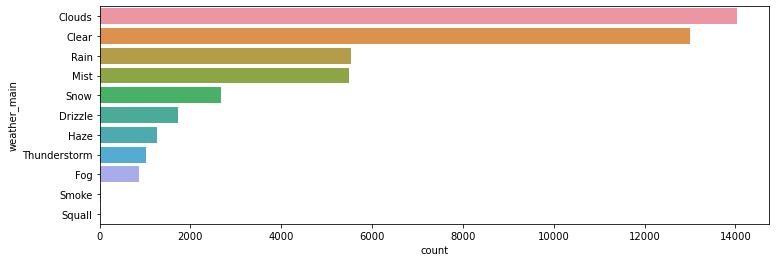

In [20]:
make_plot.plot_categorical(df,
                           'weather_main',
                           order = df['weather_main'].value_counts().index)

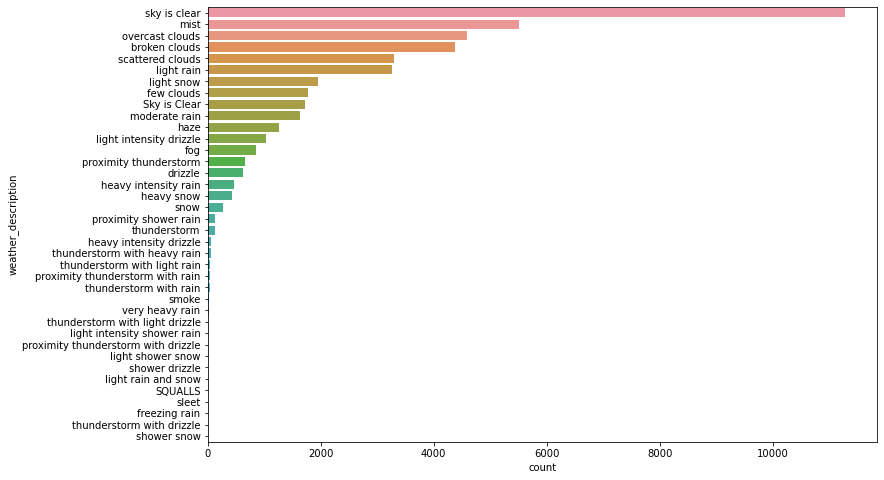

In [21]:
make_plot.plot_categorical(df,'weather_description',
                           size = (12,8),
                           order = df['weather_description'].value_counts().index)

In [22]:
make_plot.ret_count_values(df,
                           'weather_main',
                           normalize = True)*100

Clouds          30.763501
Clear           28.496002
Rain            12.108665
Mist            12.053894
Snow             5.869208
Drizzle          3.781356
Haze             2.751671
Thunderstorm     2.236828
Fog              1.886296
Smoke            0.043816
Squall           0.008763
Name: weather_main, dtype: float64

In [23]:
make_plot.ret_count_values(df,
                           'weather_description',
                           normalize = True)*100

sky is clear                           24.714646
mist                                   12.053894
overcast clouds                        10.053675
broken clouds                           9.591412
scattered clouds                        7.220944
light rain                              7.148647
light snow                              4.263337
few clouds                              3.897470
Sky is Clear                            3.781356
moderate rain                           3.577610
haze                                    2.751671
light intensity drizzle                 2.267499
fog                                     1.886296
proximity thunderstorm                  1.459086
drizzle                                 1.362690
heavy intensity rain                    1.014350
heavy snow                              0.961770
snow                                    0.598094
proximity shower rain                   0.295761
thunderstorm                            0.273853
heavy intensity driz

The categories 'sky is clear' and 'sky is Clear' mean the same. This needs to be recoded into same category.

## Bivariate Analysis

In [24]:
class bivariate_plots():
    
    def scatter_plots(self, x, y, df, size = None):
        plt.figure(figsize=size)
        sns.scatterplot(x = x, y = y,data = df)
    
    def line_plot(self, x, y, df, size = None):
        plt.figure(figsize=size)
        sns.lineplot(x = x, y = y, data = df)
        
    def box_plot(self,x,y,df,hue = None,size = None):
        plt.figure(figsize = size)
        sns.boxplot(x = x, y = y,data = df,hue = hue)
        
    def violin_plot(self,x,y,df,size = None):
        plt.figure(figsize = size)
        sns.violinplot(x = x, y = y,data = df)
    
    def box_violin_plots(self,x,y,df,size = None):
        plt.figure(figsize = size)
        plt.subplot(2,1,1)
        sns.boxplot(x = x, y = y,data = df)
        plt.subplot(2,1,2)
        sns.violinplot(x = x, y = y,data = df)
    
    def strip_plot(self,x,y,df,size = None):
        plt.figure(figsize = size)
        sns.stripplot(x = x, y = y,data = df)
        
    def swarm_plot(self,x,y,df,size = None):
        plt.figure(figsize = size)
        sns.swarmplot(x = x, y = y,data = df)
        
    def cat_plot(self,x,y,df,hue=None,col=None,size = None,kind = None):
        plt.figure(figsize = size)
        sns.catplot(x = x, y = y,data = df,hue = hue ,col = col,kind = kind)
    
    def pair_plot(self,df):
        sns.pairplot(data = df)
    
make_biplot = bivariate_plots()

## Scatter Plots for Numerical features

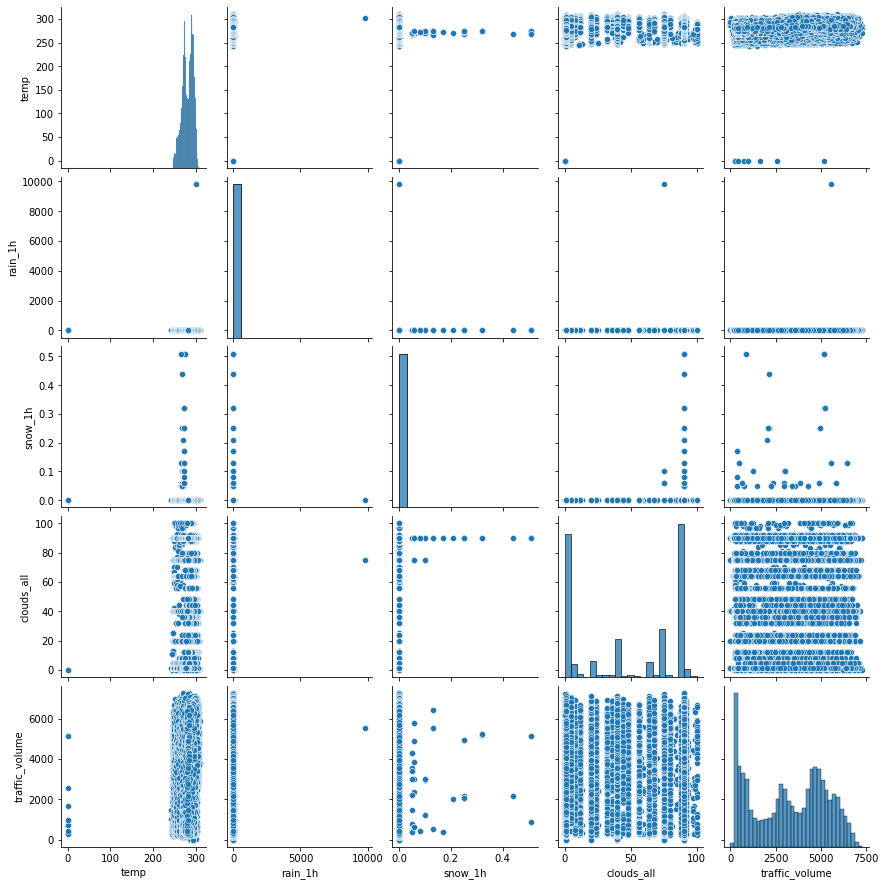

In [25]:
num_feat = ['temp','rain_1h','snow_1h','clouds_all','traffic_volume']
make_biplot.pair_plot(df[num_feat])

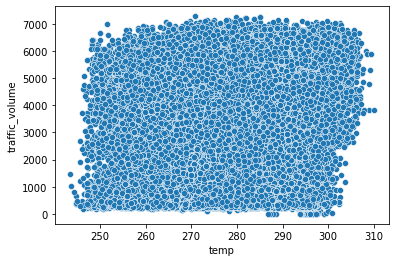

In [26]:
make_biplot.scatter_plots(x = 'temp', 
                          y = 'traffic_volume', 
                          df = df[df['temp'] > 0])

There seems to be no direct relation between temperature and traffic volume.

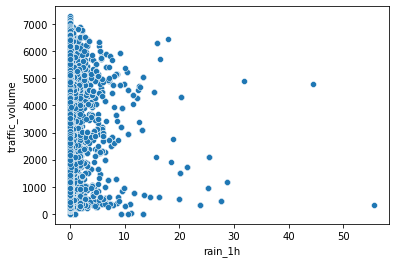

In [27]:
make_biplot.scatter_plots(x = 'rain_1h',
                          y = 'traffic_volume',
                          df = df[df['rain_1h']<df['rain_1h'].max()])

Rain recorded do not show any direct relationship with the traffic volume.

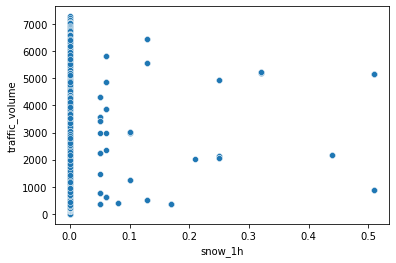

In [28]:
make_biplot.scatter_plots(x = 'snow_1h',
                          y = 'traffic_volume',
                          df = df)

Snowfall reveals no firect relation with the traffic volume.

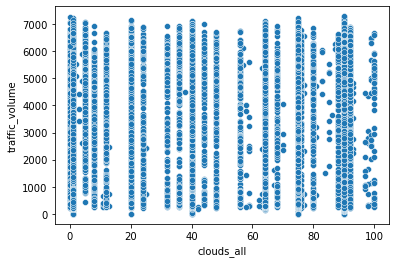

In [29]:
make_biplot.scatter_plots(x = 'clouds_all', 
                          y = 'traffic_volume', 
                          df = df)

clouds_all do not show any direct relation with the traffic volume.

## Time line of Traffic Volume for each year

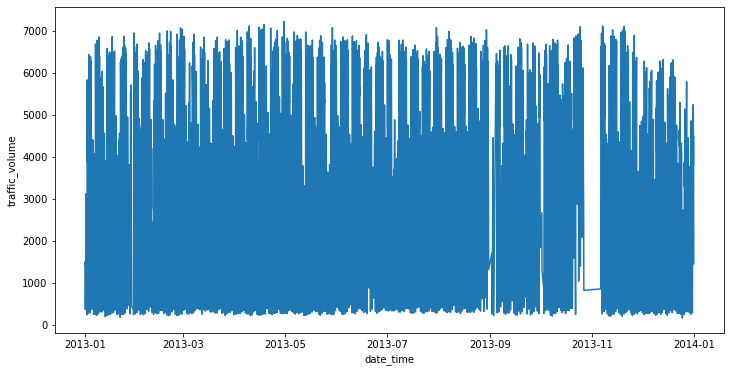

In [30]:
make_biplot.line_plot(x = 'date_time',
                      y = 'traffic_volume',
                      df = df[(df['year'] == 2013)],
                      size = (12,6))

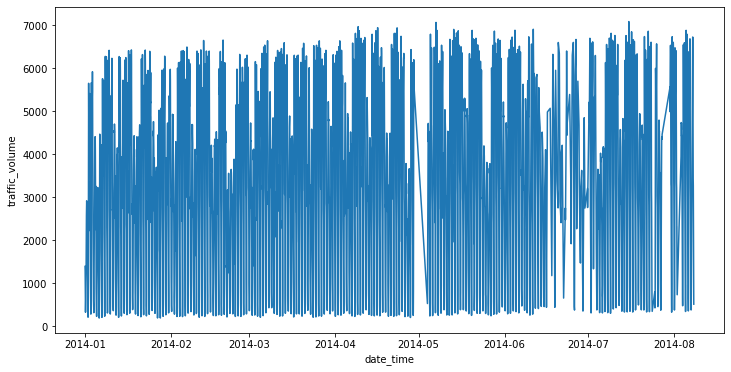

In [31]:
make_biplot.line_plot(x = 'date_time',
                      y = 'traffic_volume',
                      df = df[(df['year'] == 2014)],
                      size = (12,6))

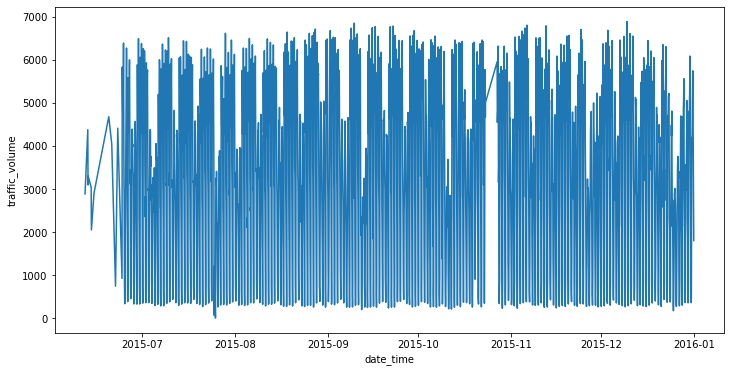

In [32]:
make_biplot.line_plot(x = 'date_time',
                      y = 'traffic_volume',
                      df = df[(df['year'] == 2015)],
                      size = (12,6))

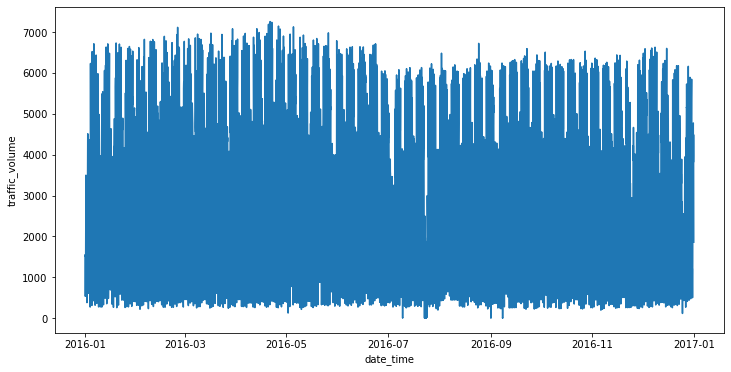

In [33]:
make_biplot.line_plot(x = 'date_time',
                      y = 'traffic_volume',
                      df = df[(df['year'] == 2016)],
                      size = (12,6))

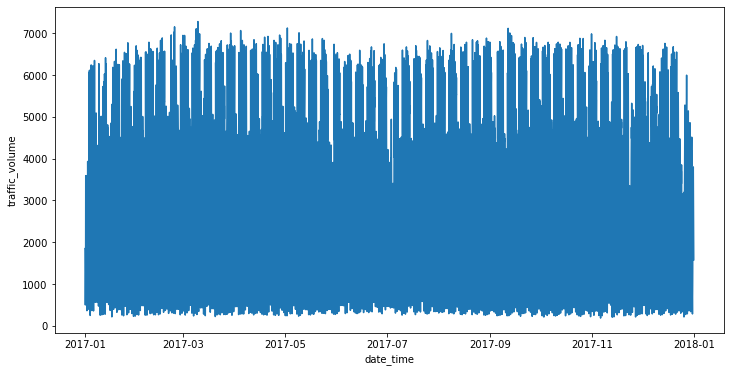

In [34]:
make_biplot.line_plot(x = 'date_time',
                      y = 'traffic_volume',
                      df = df[(df['year'] == 2017)],
                      size = (12,6))

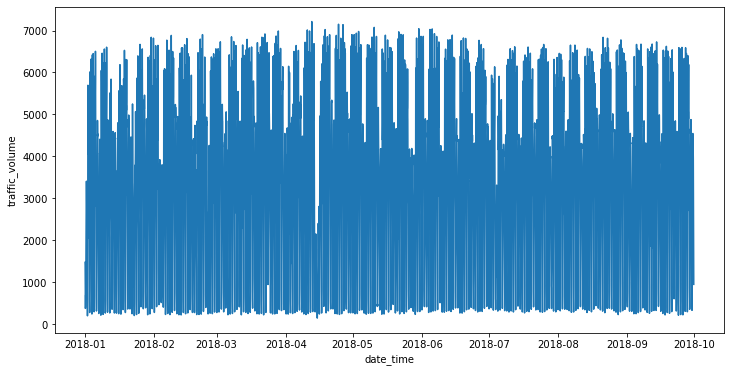

In [35]:
make_biplot.line_plot(x = 'date_time',
                      y = 'traffic_volume',
                      df = df[(df['year'] == 2018)],
                      size = (12,6))

After examining the traffic volume for each year, we can conclude that for certain years the traffic volume is missing. For the year 2015, the data is missing for around 6 months. If the data is not missing, a time series forecast can be implemented easily. But using regression we can predict the traffic volume but the performance may take a hit.

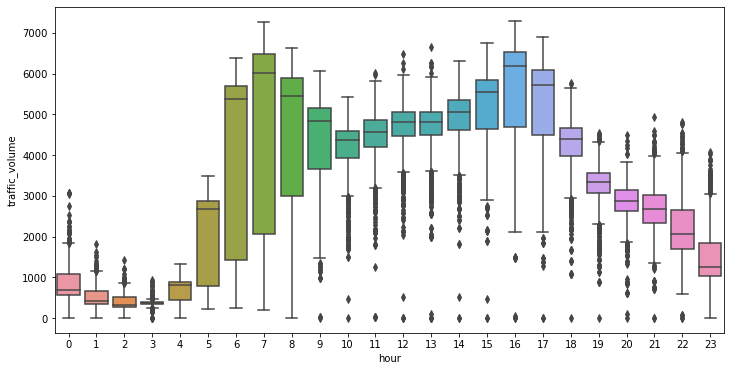

In [36]:
make_biplot.box_plot(x = 'hour',
                     y = 'traffic_volume',
                     df = df,
                     size = (12,6))

The above plot describes the distribution of traffic volume compared to time in hours. Based on the plot it can be concluded that during wee hours, the volume is low and during work hours the volume is high. Based on this analysis, we can bucket the hours into different buckets. The buckets are :

a. 0-5 : Wee Hours

b. 6-9 : Morning Hours

c. 10-14 : Noon Hours

d. 15-17 : Evening Hours

e. 18-23 : Late Hours

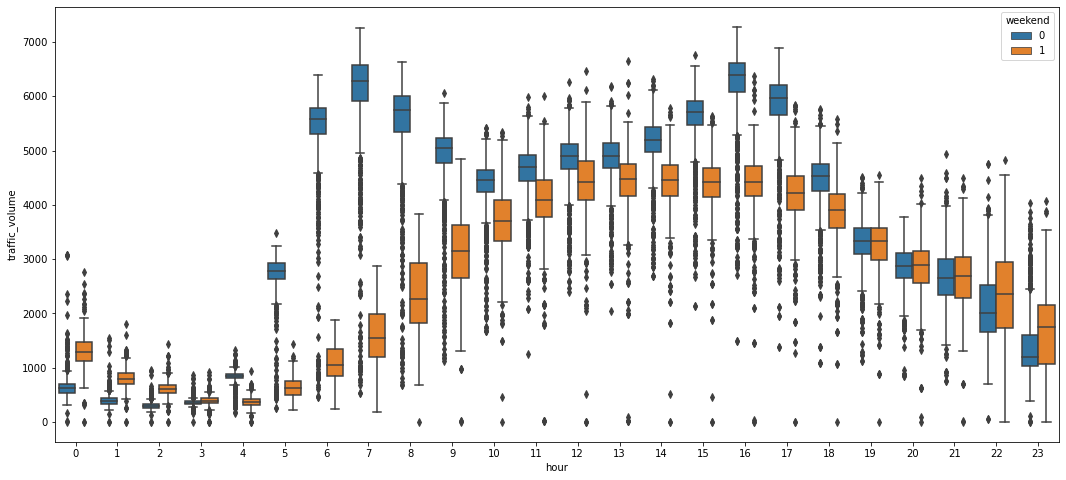

In [37]:
make_biplot.box_plot(x = 'hour',
                     y = 'traffic_volume',
                     hue = 'weekend',
                     df = df,
                     size = (18,8))

Clearly the traffic volume can be distinguished by the weekend feature. During weekday, higher traffic is observed during office hours and vice versa for the weekend.

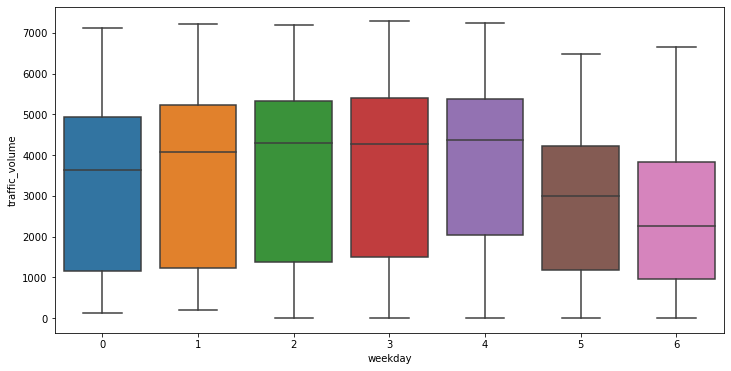

In [38]:
make_biplot.box_plot(x = 'weekday',
                     y = 'traffic_volume',
                     df = df,
                     size = (12,6))

Based on the above plots realted to weekday and traffic volume, 5 and 6 can be groped together and the remaing days can be gropued together.

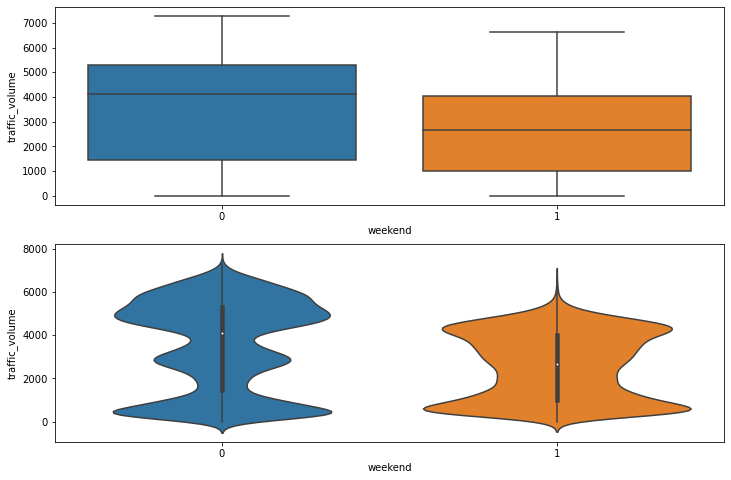

In [39]:
make_biplot.box_violin_plots(x = 'weekend',
                        y = 'traffic_volume',
                        df = df,
                        size = (12,8))

From the above figure it is clear that traffic volume is high during the weekdays and low during weekends.

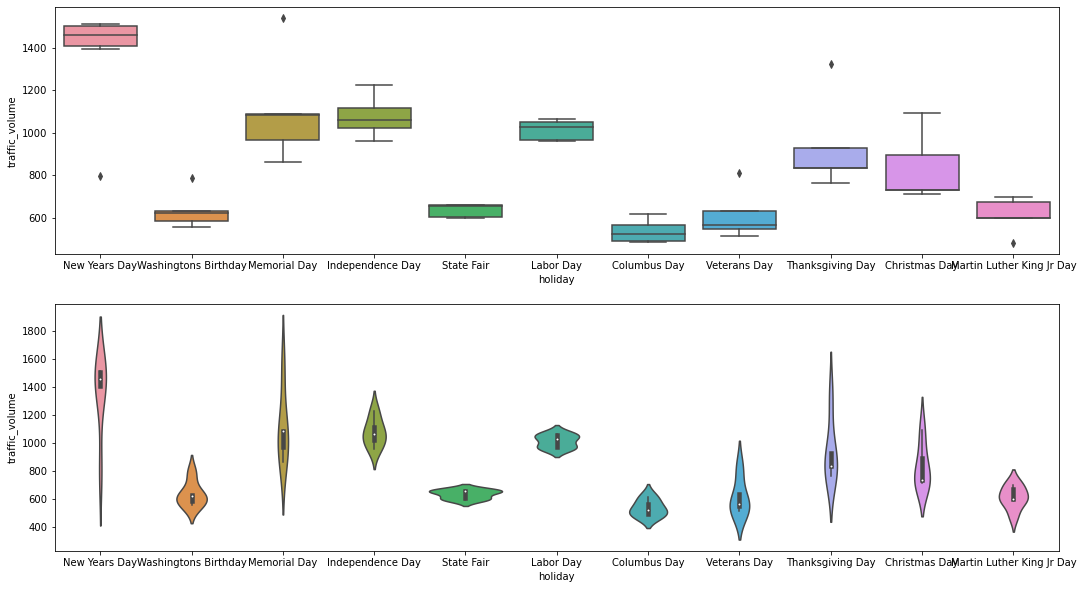

In [40]:
make_biplot.box_violin_plots(x = 'holiday', 
                             y = 'traffic_volume',
                             df = df[df['holiday'] != 'None'],
                             size = (18,10))

Based on the distribution of the traffic volume during the public holidays, New Years day have greater traffic volume compared to the rest of the other holidays. A logical grouping of these holidays in to various buckets based on the traffic pattern will make things easy for the modelling. As the number of records with holidays are low, clubbing all the holidays into one group as one category as 'holidays' will be helpful.

In [61]:
x = df.groupby('month')['traffic_volume'].mean().reset_index()
x.sort_values(by = ['traffic_volume'])

,month,traffic_volume
11,12,3036.250000
0,1,3051.081378
10,11,3159.247846
1,2,3197.945547
6,7,3205.481752
8,9,3303.049334
3,4,3304.372388
2,3,3308.388611
9,10,3361.694153
4,5,3366.319432


<AxesSubplot:xlabel='month', ylabel='traffic_volume'>

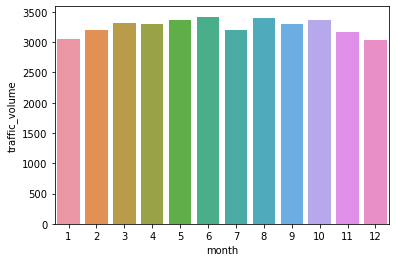

In [63]:
sns.barplot(y = 'traffic_volume', x = 'month',data = x,order = x['month'])

Based on the above distribution, 

a. months from Nov to Feb have low traffic volumes

b. months Mar, Apr, July and Sept have medium traffic volumes

c. months May, June, Aug and Oct have high traffic volumes

## Relation with weather_main with numerical features

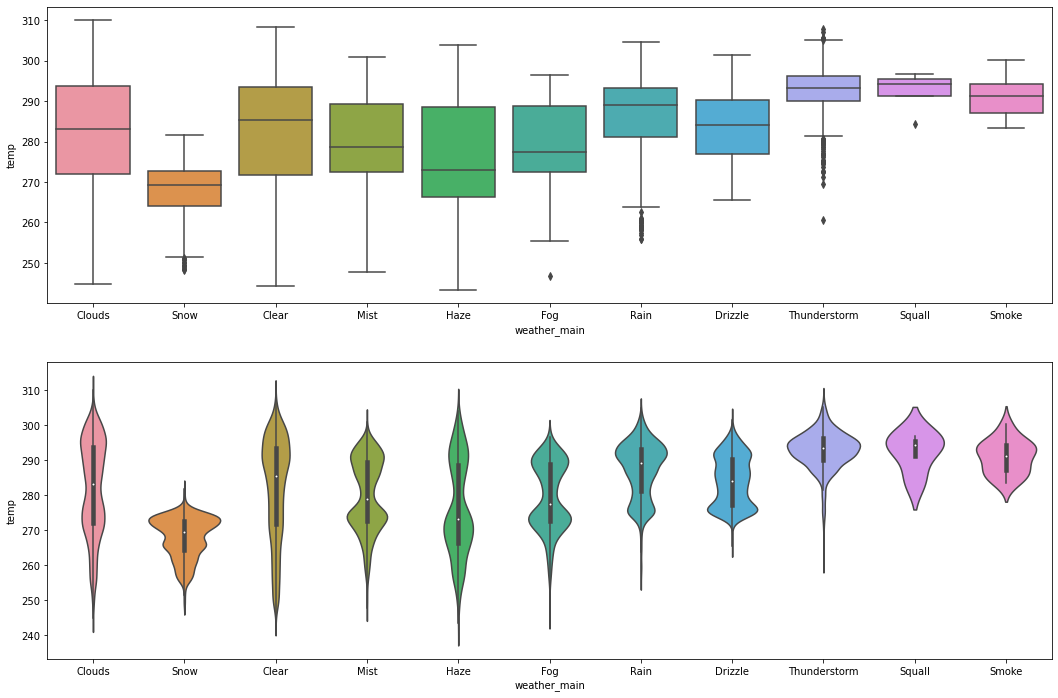

In [41]:
make_biplot.box_violin_plots(x = 'weather_main',
                             y = 'temp',
                             df = df[df['temp'] > df['temp'].min()],
                             size = (18,12))

The temperature range for squall and smoke are high and for snow the temperature is low.

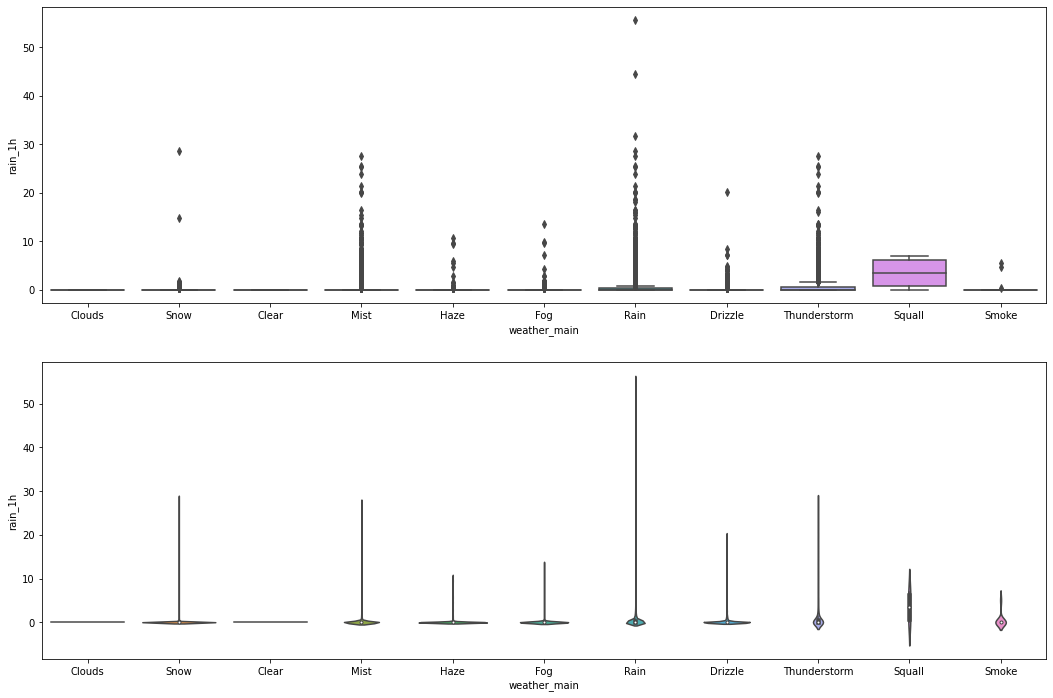

In [42]:
make_biplot.box_violin_plots(x = 'weather_main',
                             y = 'rain_1h',
                             df = df[df['rain_1h'] < df['rain_1h'].max()],
                             size = (18,12))

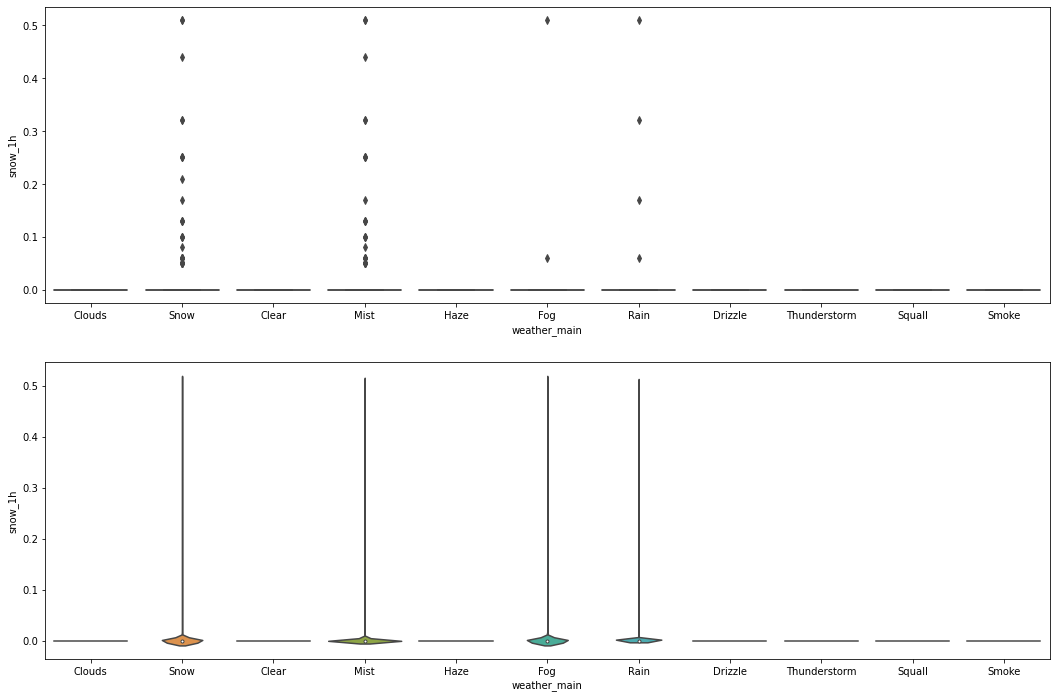

In [43]:
make_biplot.box_violin_plots(x = 'weather_main',
                             y = 'snow_1h',
                             df = df,
                             size = (18,12))

Snowfall is observed usually for the weather description of snow, mist, fog and rain.

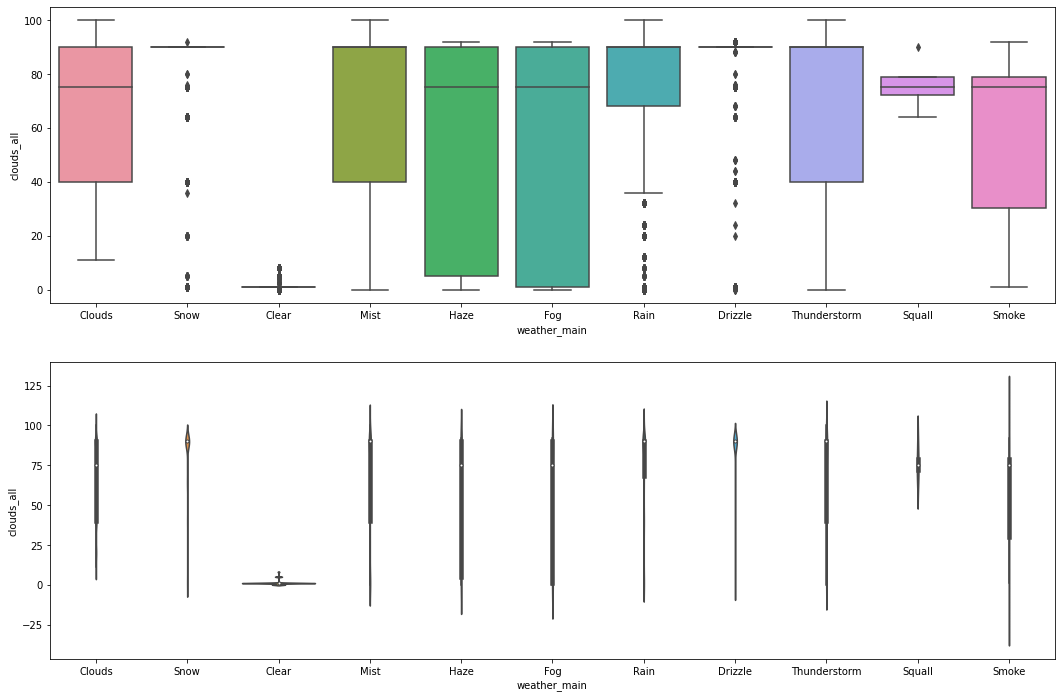

In [44]:
make_biplot.box_violin_plots(x = 'weather_main',
                             y = 'clouds_all',
                             df = df,
                             size = (18,12))

Cloud cover has been low when sky is clear and for the remaining categories cloud cover is spread out from low to maximum.

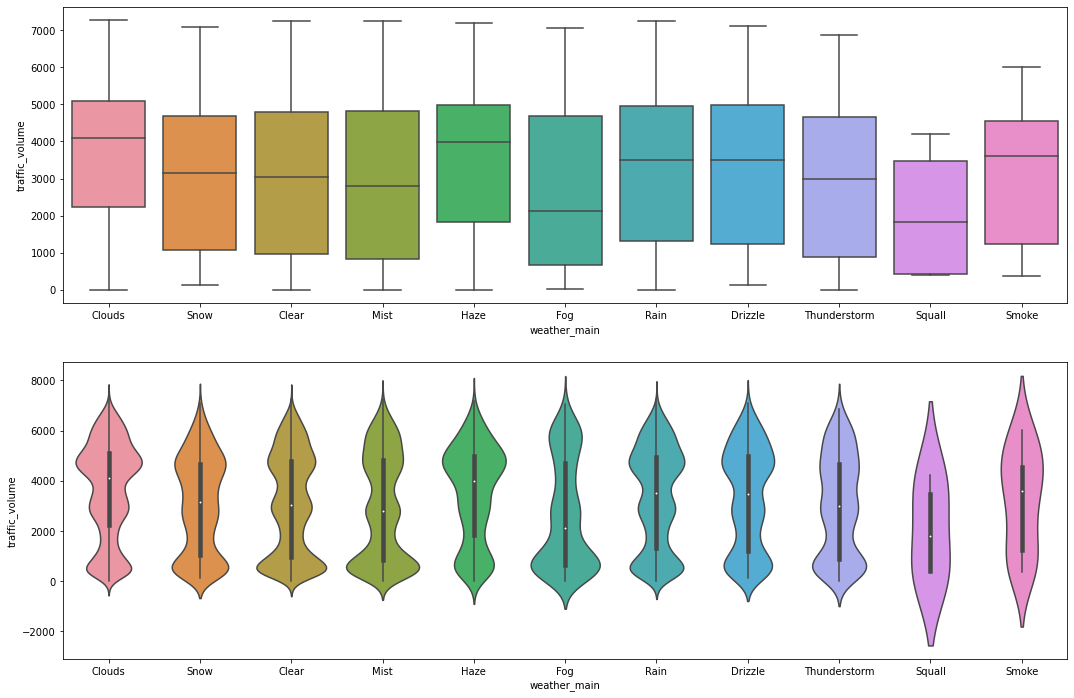

In [45]:
make_biplot.box_violin_plots(x = 'weather_main',
                             y = 'traffic_volume',
                             df = df[df['rain_1h'] < df['rain_1h'].max()],
                             size = (18,12))

a. The traffic volume looks to be affected by fog. Presence of fog leads to lower traffic volume.
b. The distribution of traffic volume for the rain and drizzle look similar.
c. The observations from squall and smoke can be ignored because of low presentation in the data.

## Relation between textual descriptions of weather_main and the relevant features such as rain,snow,drizzle,cloud and thunder storm

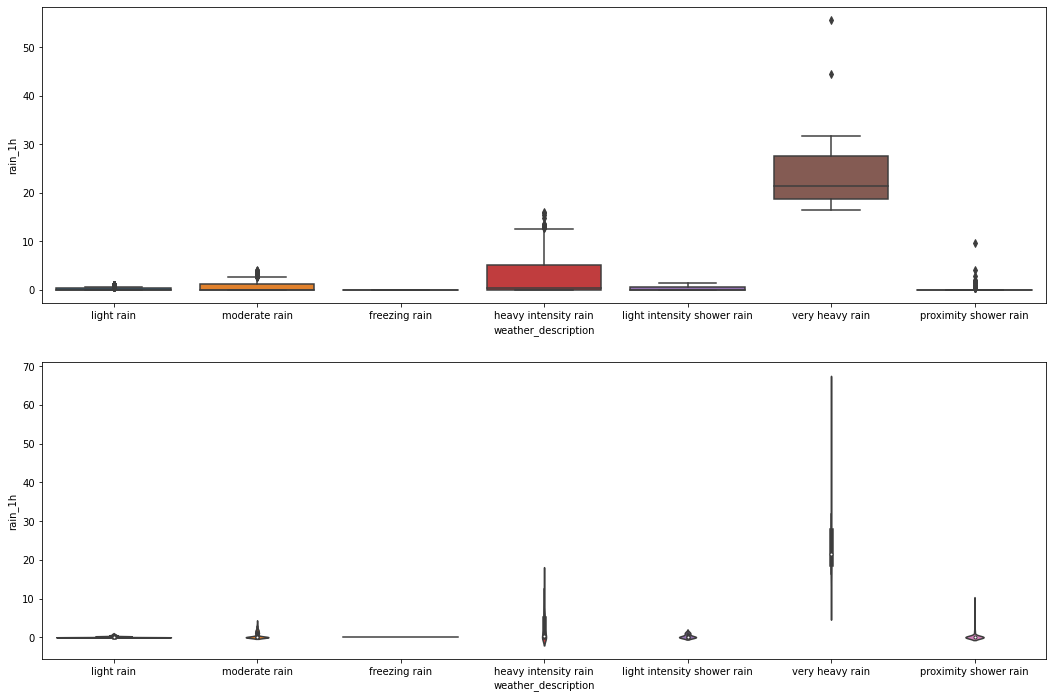

In [46]:
req = df[df['weather_main']=='Rain']
make_biplot.box_violin_plots(x = 'weather_description',
                             y = 'rain_1h',
                             df = req[req['rain_1h'] < req['rain_1h'].max()],
                             size = (18,12)
                        )

The above plot reveals the relationship between rain_1h with the rain related descriptions in weather_main feature. The descriptions match therain_1h feature perfectly.

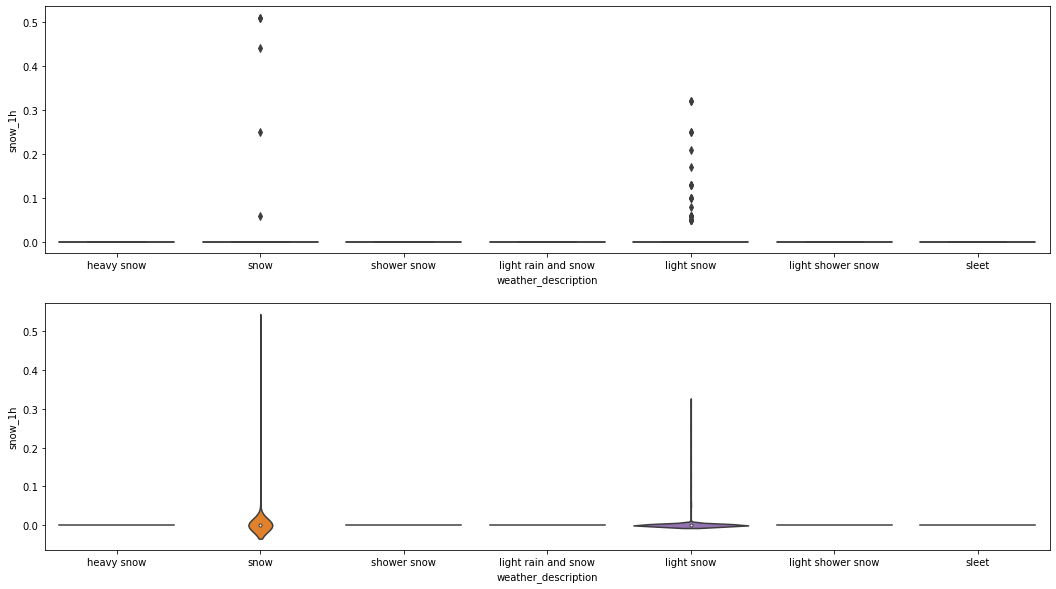

In [47]:
req = df[df['weather_main']=='Snow']
make_biplot.box_violin_plots(x = 'weather_description',
                             y = 'snow_1h',
                             df = req,
                             size = (18,10))

There is no clear distinction with the weather descriptions related to snow and the snow levels recorded. The category heavy snow shows low snow levels and the categories snow and light snow show heavy snow values.

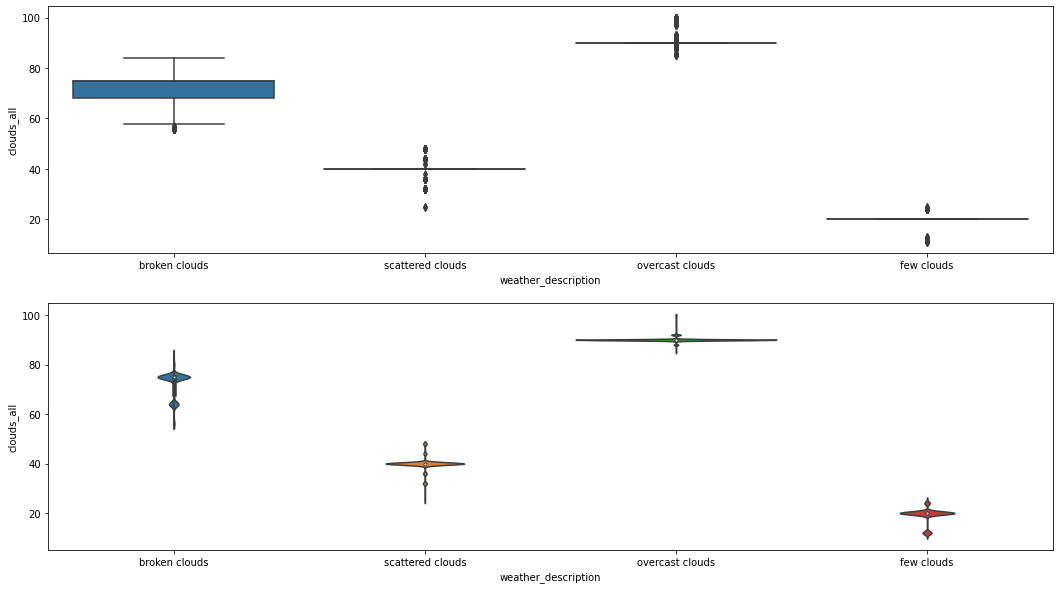

In [48]:
req = df[df['weather_main']=='Clouds']
make_biplot.box_violin_plots(x = 'weather_description',
                             y = 'clouds_all',
                             df = req,
                             size = (18,10))

The above plot reveals the relationship between cloud cover with the cloud related descriptions in weather_main feature. The descriptions match the cloud cover feature perfectly.

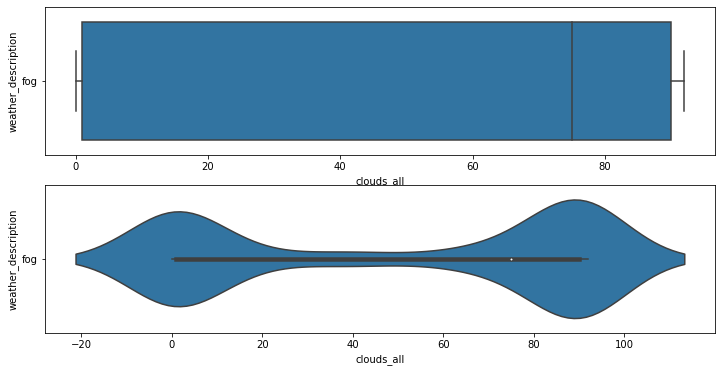

In [49]:
req = df[df['weather_main']=='Fog']
make_biplot.box_violin_plots(y = 'weather_description',
                             x = 'clouds_all',
                             df = req,
                             size = (12,6))

Fog is spread across the values of cloud cover but the median of the cloud cover is to right side indicating that grater clouds relate to fog.

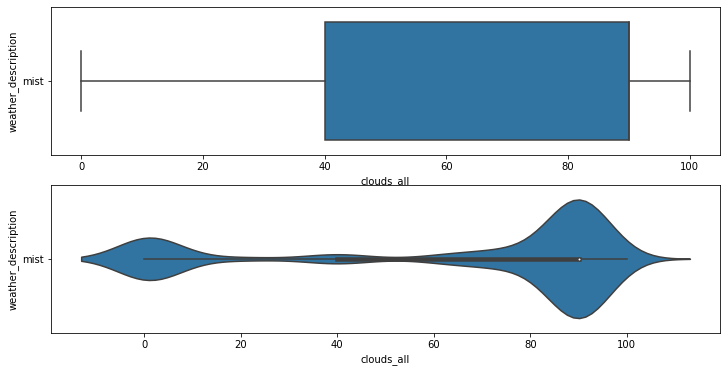

In [50]:
req = df[df['weather_main']=='Mist']
make_biplot.box_violin_plots(y = 'weather_description',
                             x = 'clouds_all',
                             df = req,
                             size = (12,6))

Mist looks one step above fog in terms of cloud cover. Mist condition is best described with very high cloud cover. 

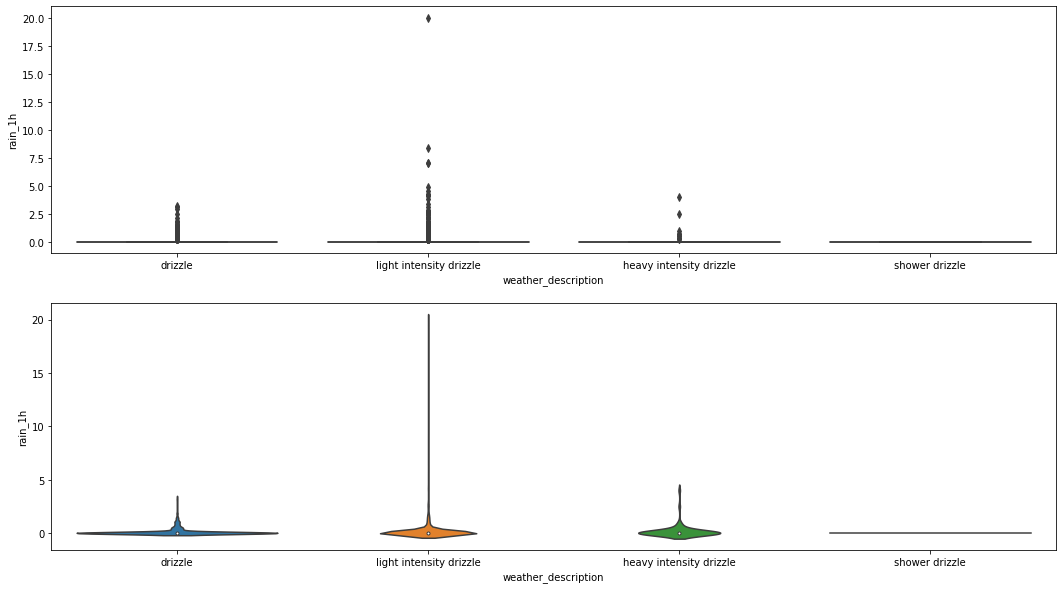

In [51]:
req = df[df['weather_main'] == 'Drizzle']
make_biplot.box_violin_plots(x = 'weather_description',
                             y = 'rain_1h',
                             df = req,
                             size = (18,10)
                            )

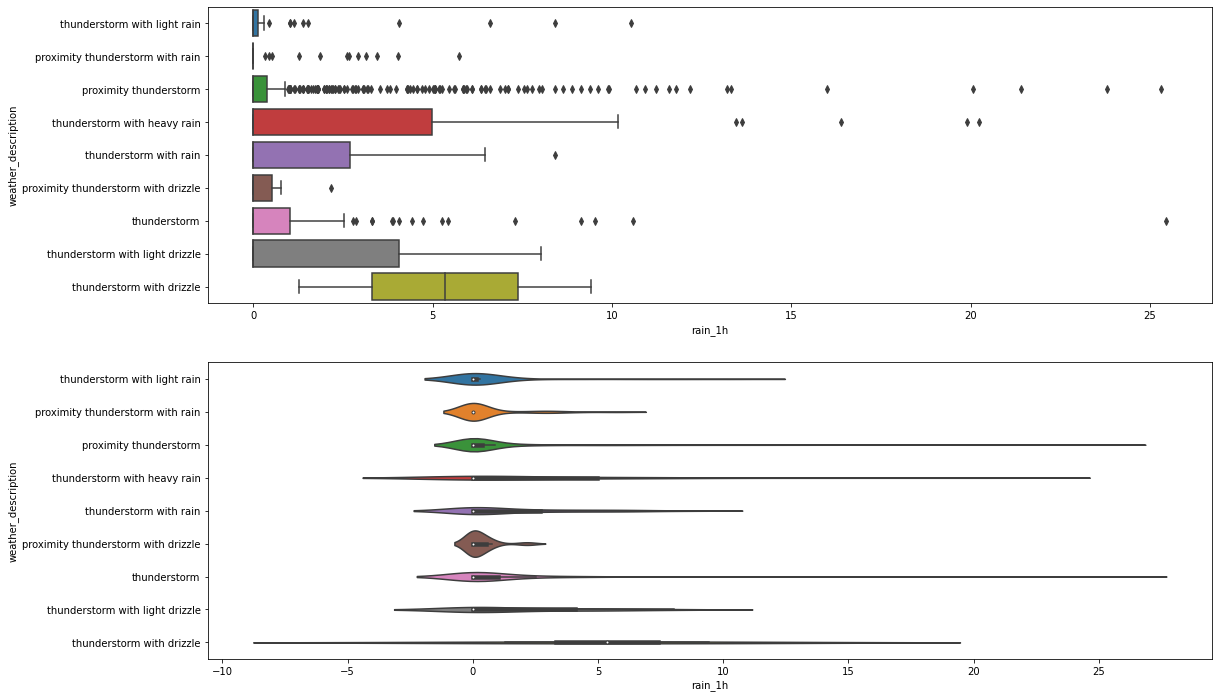

In [52]:
req = df[df['weather_main']=='Thunderstorm']
make_biplot.box_violin_plots(y = 'weather_description',
                             x = 'rain_1h',
                             df = req[req['rain_1h'] < req['rain_1h'].max()],
                             size = (18,12)
                        )

The above plot reveals the relationship between rain_1h with the tunderstorm related descriptions in weather_main feature. The descriptions match the rain_1h feature perfectly.

## Relation between weather_description,rain,snow,clouds and traffic volume for each category of weather_main feature

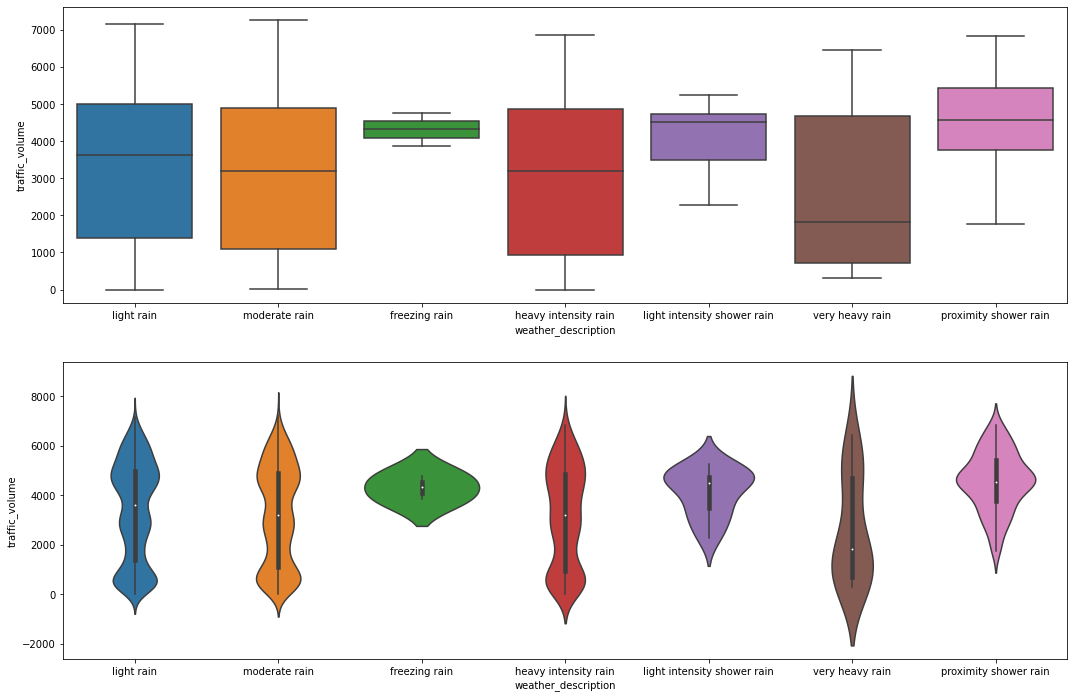

In [53]:
req = df[df['weather_main']=='Rain']
make_biplot.box_violin_plots(x = 'weather_description',
                             y = 'traffic_volume',
                             df = req,
                             size = (18,12)
                        )

Clearly, traffic volume is affected by very heavy rain. And light rain, moderate rain, heavy intensity rain distributions are spread with low to high traffic volumes. Freezing rain, light intensity rain and proximity shower rain seem to have no affect on the traffic volume as the the numbers are high.

Based on the above plot the categories can be regrouped as follows:

a. light rain, moderate rain, heavy intensity rain -> These categories show quiet average traffic volume compared to other categories.

b. freezing rain, light intensity shower rain, proximity shower rain -> These categories have high traffic volume.

c. very heavy rain -> This category has the lowest traffic volume.

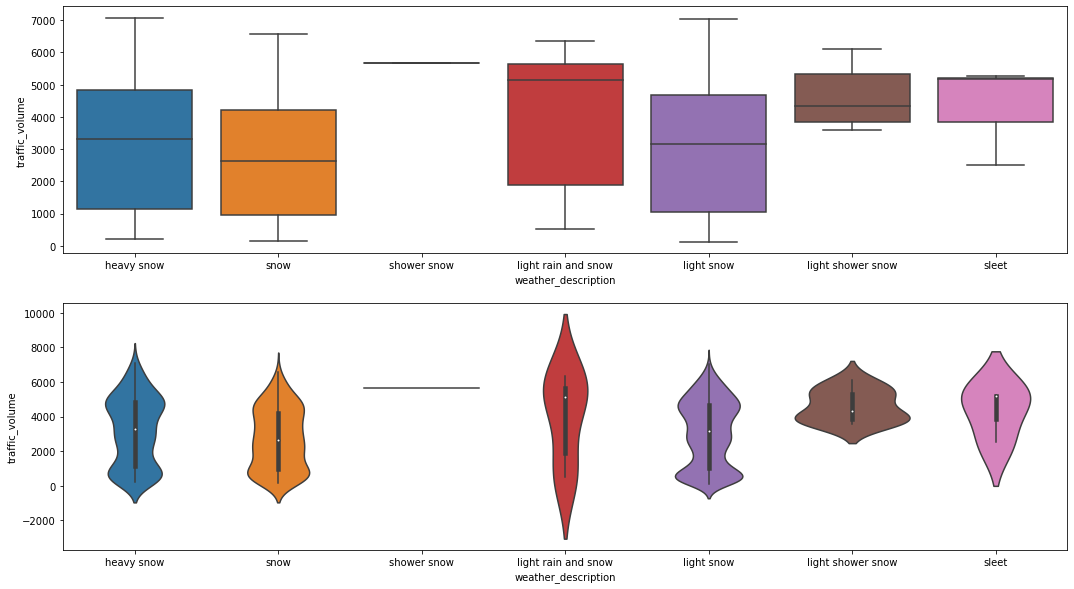

In [54]:
req = df[df['weather_main']=='Snow']
make_biplot.box_violin_plots(x = 'weather_description',
                             y = 'traffic_volume',
                             df = req,
                             size = (18,10))

<img src="./screenshots/snow.jpg">


As per the comparison of snow descriptions with the snow levels, the categories 'heavy snow', 'shower snow', 'light rain & snow', 'light shower snow' and 'sleet' show zero snow levels but the traffic volume  is high. And for the categories 'snow' and 'light snow' the snow levels are relatively high and traffic volumes are relatively low.

Based on the above analysis the regrouping of the categories can be done as follows:

a. 'heavy snow', 'shower snow', 'light rain & snow', 'light shower snow' and 'sleet'  -> These categories can be groupped as low_snow

b.  'snow' and 'light snow' ->  These categories can be groupped as high_snow.

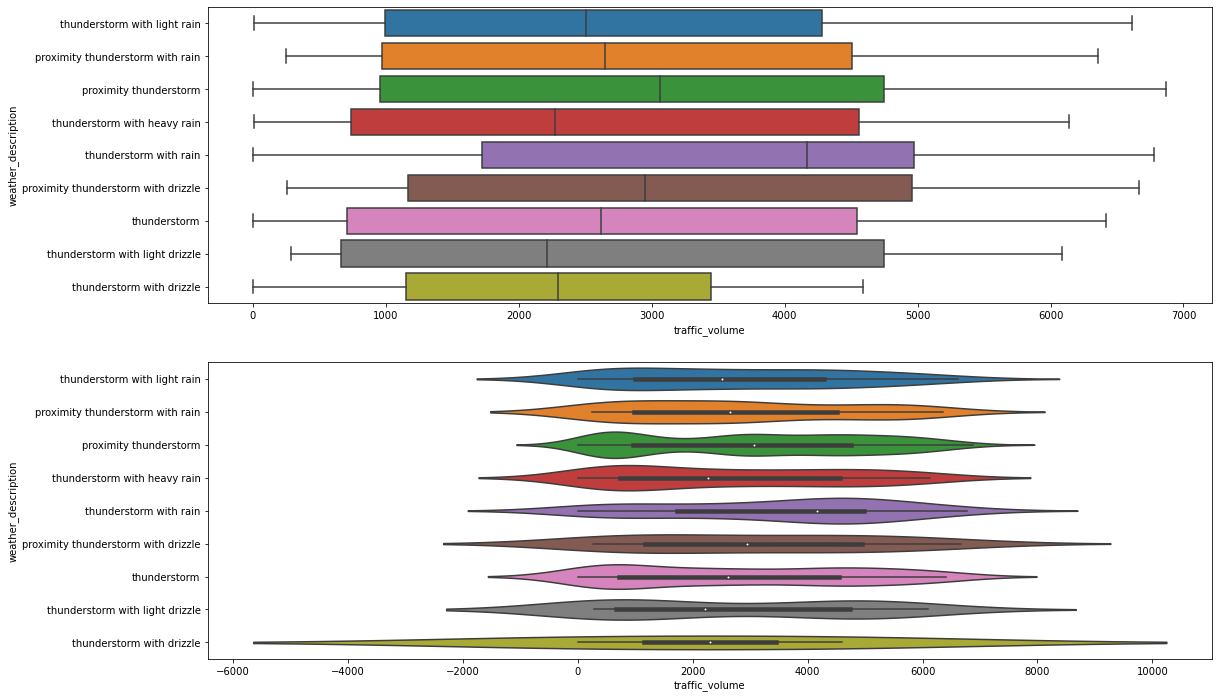

In [55]:
req = df[df['weather_main']=='Thunderstorm']
make_biplot.box_violin_plots(y = 'weather_description',
                             x = 'traffic_volume',
                             df = req,
                             size = (18,12)
                            )

Based on the above plot the distributions of all the plots look similar and few categories have very low level of presence. So we group them based on the keywords. The grouping is done as follows :

a. proximity thunderstorm, proximity thunderstorm with rain, proximity thunderstorm with drizzle are groupped based on the keyword 'proximity'

b. thunderstorm with light rain, thunderstorm with heavy rain, thunderstorm with rain, thunderstorm, thunderstorm with light drizzle, thunderstorm with drizzle are groupped together

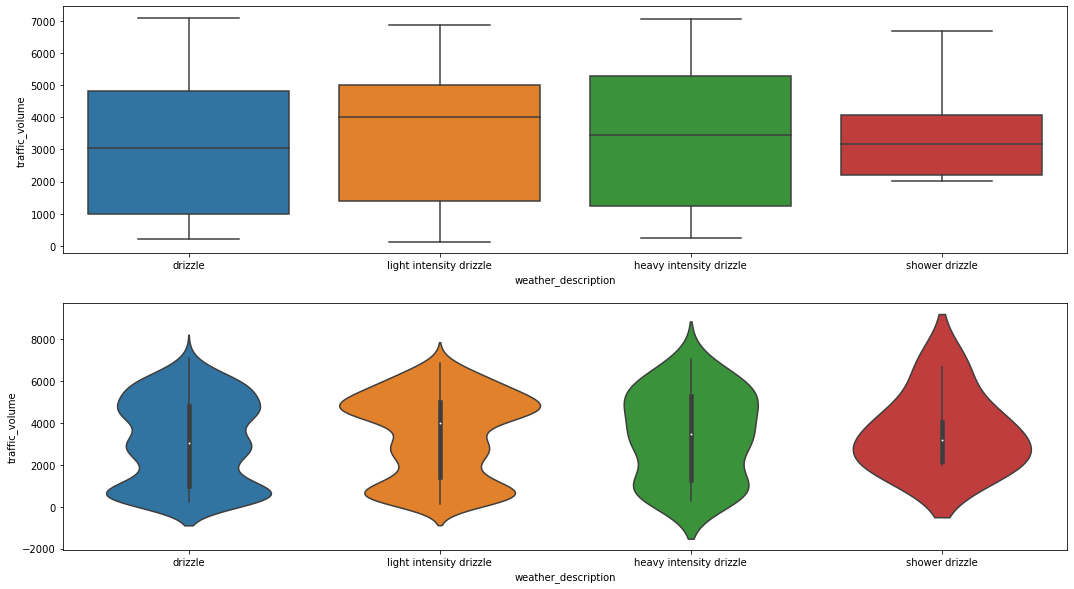

In [56]:
req = df[df['weather_main'] == 'Drizzle']
make_biplot.box_violin_plots(x = 'weather_description',
                             y = 'traffic_volume',
                             df = req,
                             size = (18,10)
                            )

Based on the above plot, the shower drizzle has different distribution than the rest of the categories and the remaining categories look to follow approximately similar distribution. So the grouping can be done as follows:

a. shower intensity drizzle, drizzle, heavy intensity drizzle -> These categories can be groupped as low_drizzle 

b. light intensity drizzle ->  These categories can be groupped as high_drizzle


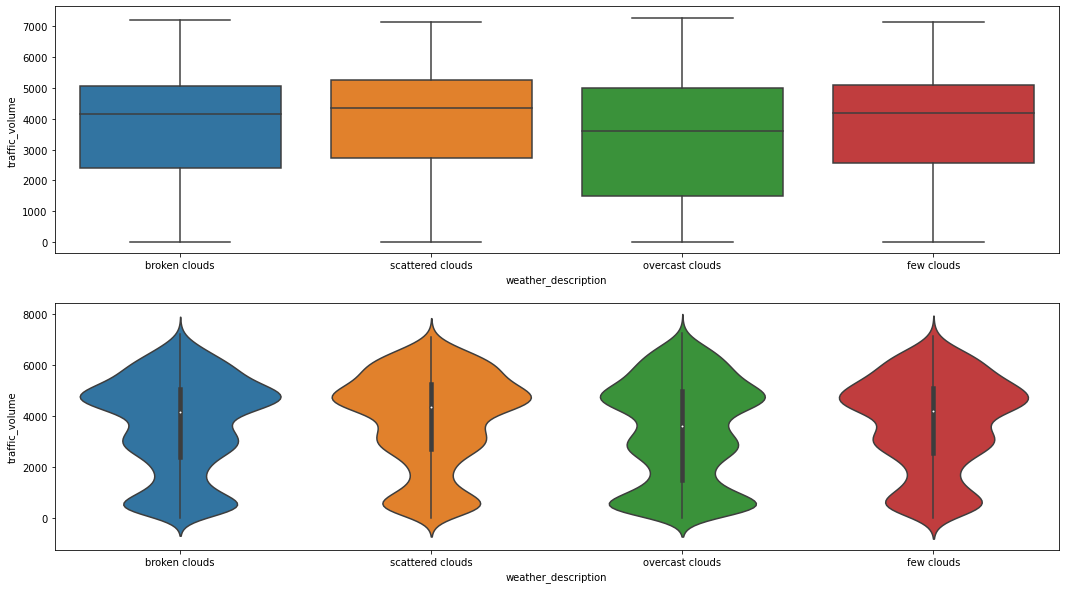

In [57]:
req = df[df['weather_main'] == 'Clouds']
make_biplot.box_violin_plots(x = 'weather_description',
                             y = 'traffic_volume',
                             df = req,
                             size = (18,10)
                            )

Based on the above figure, the distribution for scattered clouds, broken clouds and few clouds look similar i.e; traffic volume trends during these conditions have been similar and for overcast clouds conditions lower traffic volume is observed. Hence it makes sense to club the groups as following:

a. scattered clouds, broken clouds and few clouds as low clouds

b. overcast clouds as high clouds

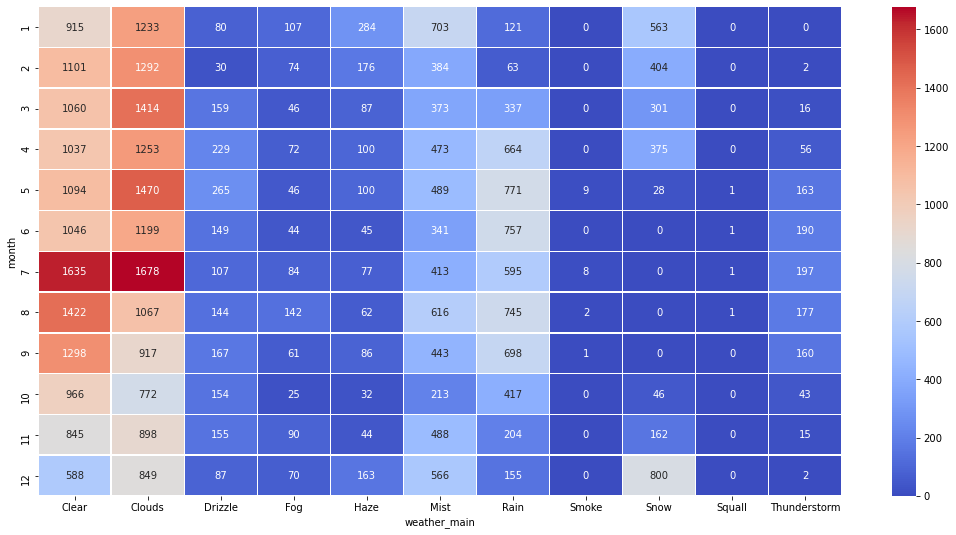

In [58]:
req = df.groupby(['month','weather_main']).count().reset_index()
req = req[['month','weather_main','holiday']]
req.columns = ['month','weather_main','count']
req['count'] = req['count'].astype('int32')

plt.figure(figsize = (18,9))
g = sns.heatmap(req.pivot(index = 'month',columns = 'weather_main',values = 'count').fillna(0),
                linewidths = .5,
                cmap = 'coolwarm',
                annot = True,
                fmt = ".0f")
plt.show()

## Basic Insights and Actions to be taken on the Data

Below are the basic insights and the actions to be taken on the data to clean and structure the data for modelling for each feature present in the data. 

i) holiday : 

Holiday feature has high number of records set to 'None'. The public holiday list account for 0.2 % of records.

Based on the distribution of the traffic volume during the public holidays, New Years day have greater traffic volume compared to the rest of the other holidays. A logical grouping of these holidays in to various buckets based on the traffic pattern will make things easy for the modelling. As the number of records with holidays are low, clubbing all the holidays into one group as one category as 'holidays' will be helpful.

ii) temp : 

Temperature feature has an anamoly value around 0. Such observation can be a reading from a faulty sensor.This has to be imputed based on the nearest neighbours(based on the time of the record).

iii) rain_1h :

Rain feature has an anamoly value of 9831.3 . This value is recorded as 'very heavy rain' under weather description. This observation has to be imputed based on the average rainfall for 'very heavy rain' category under weather description.


iv) snow_1h :

Based on the univariate analysis of snow_1h, the feature has large number of records near 0. And the plot suggests that there are few outliers, but practically these values look to be real enough.

v) clouds_all :

This feature has has two big humps around 0 & 90 and small hump around 40.

vi) Weather_main & Weather_description :

weather_main and weather_description describe the weather condition textually. The descriptions include rainy, cloudy, smoke, clear, fog, haze, drizzle, mist and squall. These features can be clubbed together and form a single feature.

    rain :

    Clearly, traffic volume is affected by very heavy rain. And light rain, moderate rain, heavy intensity rain distributions are spread with low to high traffic volumes. Freezing rain, light intensity rain and proximity shower rain seem to have no affect on the traffic volume as the the numbers are high.

    Based on the above plot the categories can be regrouped as follows:

    a. light rain, moderate rain, heavy intensity rain -> These categories show quiet average traffic volume compared to other categories. Categorised as avg_rain

    b. freezing rain, light intensity shower rain, proximity shower rain -> These categories have high traffic volume. Categorised as low_rain

    c. very heavy rain -> This category has the lowest traffic volume. Categorised as heavy_rain.

    snow :

    As per the comparison of snow descriptions with the snow levels, the categories 'heavy snow', 'shower snow', 'light rain & snow', 'light shower snow' and 'sleet' show zero snow levels but the traffic volume is high. And for the categories 'snow' and 'light snow' the snow levels are relatively high and traffic volumes are relatively low.

    Based on the above analysis the regrouping of the categories can be done as follows:

    a. 'heavy snow', 'shower snow', 'light rain & snow', 'light shower snow' and 'sleet' -> These categories can be groupped as low_snow

    b. 'snow' and 'light snow' -> These categories can be groupped as high_snow.
    
    drizzle :
    
    Based on the above plot, the shower drizzle has different distribution than the rest of the categories and the remaining categories look to follow approximately similar distribution. So the grouping can be done as follows:

    a. shower intensity drizzle, drizzle, heavy intensity drizzle -> These categories can be groupped as low_drizzle

    b. light intensity drizzle -> These categories can be groupped as high_drizzle

    clouds :
    Based on the above figure, the distribution for scattered clouds, broken clouds and few clouds look similar i.e; traffic volume trends during these conditions have been similar and for overcast clouds conditions lower traffic volume is observed. Hence it makes sense to club the groups as following:

    a. scattered clouds, broken clouds and few clouds as low clouds

    b. overcast clouds as high clouds
    
    Thunderstorm :
    
    Based on the above plot the distributions of all the plots look similar and few categories have very low level of presence. So we group them based on the keywords. The grouping is done as follows :

    a. proximity thunderstorm, proximity thunderstorm with rain, proximity thunderstorm with drizzle are groupped based on the keyword 'proximity'

    b. thunderstorm with light rain, thunderstorm with heavy rain, thunderstorm with rain, thunderstorm, thunderstorm with light drizzle, thunderstorm with drizzle are groupped together.
    
    clear :
    
    This category has two categories under weather_description i.e; 'sky is clear' and 'sky is Clear'. Hence the category has to be regrouped into one category.

    Mist :
    
    There is only one category available.
    
    Fog :
    
    There is only one category available.

    Haze :
    
    There is only one category available.
    
    Squall & Smoke :
    
    The number of records for squall and smoke are too low. So these categories can be goupped together into one category as smoke.    

vii) date_time :

The timeline of the database ranges from '2013-01-01 00:00:00' to '2018-09-30 23:00:00'. The observations are recorded every hour of each day. There are few inconsistencies in the timeline of the data. Records for a period of 6 months are not collected. The time period the data was not collected is in the year 2015 Jan to Jun.

Based on the above analysis on the time component of the date_time feature, it can be concluded that during wee hours, the volume is low and during work hours the volume is high. Based on this analysis, we can bucket the hours into different buckets. The buckets are :

a. 0-5 : Wee Hours

b. 6-9 : Morning Hours

c. 10-14 : Noon Hours

d. 15-17 : Evening Hours

e. 18-23 : Late Hours

Based on the traffic distribution compared to months, 

a. months from Nov to Feb have low traffic volumes -> Grouped as season_0

b. months Mar, Apr, July and Sept have medium traffic volumes -> Grouped as season_1

c. months May, June, Aug and Oct have high traffic volumes -> Grouped as season_2

viii) traffic_volume :

The readings of the traffic volume are not recorded continuously. Traffic volume records are missing in the year 2014 in the month of May and in the year 2015 for a period of 6 months(Jan-Jun) or more. There are few records that have multiple weather descriptions of the weather feature to describe the traffic volume for specific point of time.